## Homework Week 3

In [230]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import accuracy_score, mean_squared_error, mutual_info_score

In [231]:
url = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"

In [232]:
!wget $url -O data.csv 

--2023-09-27 22:50:39--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  7.53MB/s    in 0.2s    

2023-09-27 22:50:40 (7.53 MB/s) - ‘data.csv’ saved [1475504/1475504]



In [233]:
cols = ['Make','Model','Year','Engine HP','Engine Cylinders','Transmission Type','Vehicle Style','highway MPG','city mpg', 'MSRP']
df_full = pd.read_csv('data.csv', usecols=cols)
df_full.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


## Data Prep

In [234]:
df = df_full
df.columns = df.columns.str.replace(' ', '_').str.lower()

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [235]:
df.head().T

,0,1,2,3,4
make,bmw,bmw,bmw,bmw,bmw
model,1_series_m,1_series,1_series,1_series,1_series
year,2011,2011,2011,2011,2011
engine_hp,335.0,300.0,300.0,230.0,230.0
engine_cylinders,6.0,6.0,6.0,6.0,6.0
transmission_type,manual,manual,manual,manual,manual
vehicle_style,coupe,convertible,coupe,coupe,convertible
highway_mpg,26,28,28,28,28
city_mpg,19,19,20,18,18
msrp,46135,40650,36350,29450,34500


In [236]:
df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [237]:
df = df.fillna(0)
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [238]:
df.head().T

,0,1,2,3,4
make,bmw,bmw,bmw,bmw,bmw
model,1_series_m,1_series,1_series,1_series,1_series
year,2011,2011,2011,2011,2011
engine_hp,335.0,300.0,300.0,230.0,230.0
engine_cylinders,6.0,6.0,6.0,6.0,6.0
transmission_type,manual,manual,manual,manual,manual
vehicle_style,coupe,convertible,coupe,coupe,convertible
highway_mpg,26,28,28,28,28
city_mpg,19,19,20,18,18
msrp,46135,40650,36350,29450,34500


In [239]:
df.rename(columns = {'msrp':'price'}, inplace = True)

In [240]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500


## Question 1

In [241]:
df.groupby('transmission_type').size()

transmission_type
automated_manual     626
automatic           8266
direct_drive          68
manual              2935
unknown               19
dtype: int64

**Answer = automatic**

## Question 2

In [242]:
numerical = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']
categorical = ['make', 'model', 'transmission_type', 'vehicle_style']

df_nums = df.copy()
df_nums = df_nums[numerical]
df_nums.describe()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg
count,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000
mean,2010.384338,247.941749,5.614655,26.637485,19.733255
std,7.579740,110.507669,1.800554,8.863001,8.987798
min,1990.000000,0.000000,0.000000,12.000000,7.000000
25%,2007.000000,170.000000,4.000000,22.000000,16.000000
50%,2015.000000,225.000000,6.000000,26.000000,18.000000
75%,2016.000000,300.000000,6.000000,30.000000,22.000000
max,2017.000000,1001.000000,16.000000,354.000000,137.000000


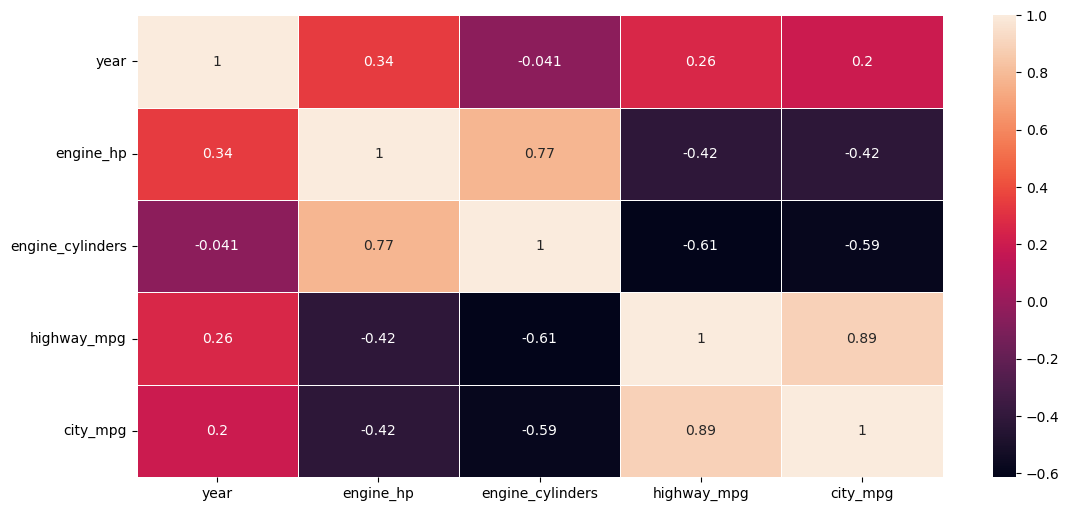

In [243]:
plt.figure(figsize=(13,6))
corr_matrix = df_nums.corr()
sn.heatmap(corr_matrix, linewidths=.7, annot=True)
plt.show()

**Answer = highway_mpg and city_mpg**

In [244]:
mean = df.price.mean()
mean

40594.737032063116

In [245]:
df['above_average'] = (df.price > mean).astype(int)
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135,1
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650,1
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350,0
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450,0
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500,0


In [246]:
df.groupby('above_average').size()

above_average
0    8645
1    3269
dtype: int64

In [247]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

del df['price']

len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [248]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [249]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

## Question 3

In [250]:
def mi_score(series):
    return mutual_info_score(series, df_train.above_average)

In [251]:
mi = df_train[categorical].apply(mi_score)
mi = mi.sort_values(ascending=False)
mi.round(2)

model                0.46
make                 0.24
vehicle_style        0.08
transmission_type    0.02
dtype: float64

**Answer = transmission_type**

## Question 4

In [252]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
y_train = df_train['above_average']

In [253]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_val = df_val['above_average']

y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
accuracy_round = np.round(accuracy,2)
accuracy_round

0.94

**Answer = 0.95**

## Question 5

In [254]:
features = categorical + numerical
features

['make',
 'model',
 'transmission_type',
 'vehicle_style',
 'year',
 'engine_hp',
 'engine_cylinders',
 'highway_mpg',
 'city_mpg']

In [255]:
for c in features:
    
    sub = features.copy()
    sub.remove(c)
    dv = DictVectorizer(sparse=False)
    train_dict = df_train[sub].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)
    
    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[sub].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)
    feature_score = accuracy_score(y_val, y_pred)
    difference =  accuracy_round - feature_score

    print(c, ",", difference)

make , -0.006286193873269008
model , 0.015954678976080494
transmission_type , -0.006286193873269008
vehicle_style , -0.0008308854385229436
year , -0.008384389425094452
engine_hp , 0.005463701216953387
engine_cylinders , -0.005866554762903986
highway_mpg , -0.006705832983634141
city_mpg , -0.005866554762903986


**Anwer = engine_hp**

## Question 6

In [256]:
cols = ['Make','Model','Year','Engine HP','Engine Cylinders','Transmission Type','Vehicle Style','highway MPG','city mpg', 'MSRP']
df_full = pd.read_csv('data.csv', usecols=cols)


df = df_full
df.columns = df.columns.str.replace(' ', '_').str.lower()

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')
    
df = df.fillna(0)

df.rename(columns = {'msrp':'price'}, inplace = True)


df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

y_train = np.log1p(df_train.price.values)
y_test = np.log1p(df_test.price.values)
y_val = np.log1p(df_val.price.values)

del df_train['price']
del df_test['price']
del df_val['price']

In [257]:
alphas = [0, 0.01, 0.1, 1, 10]

dv = DictVectorizer()

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

for a in alphas:
    model = Ridge(alpha = a, solver='sag', random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    accuracy = np.sqrt(mean_squared_error(y_val, y_pred))
    accuracy_round = np.round(accuracy,3)
    print (a, accuracy_round)

0 0.255
0.01 0.251
0.1 0.255
1 0.258
10 0.336


**Answer = 0.01**